### 練習
手工設計一個 CNN 網路，能夠模擬 Conway's Game of Life 的規則。 也就是說，將輸入一個盤面，輸出下一步的盤面狀態。

可以用多層或者一層 Hidden Layer 。

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/Gospers_glider_gun.gif" />
https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life

(from 中文維基百科)

生命遊戲中，對於任意細胞，規則如下：
每個細胞有兩種狀態-存活或死亡，每個細胞與以自身為中心的周圍八格細胞產生互動。（如圖，黑色為存活，白色為死亡）

    當前細胞為存活狀態時，當周圍低於2個（不包含2個）存活細胞時， 該細胞變成死亡狀態。（模擬生命數量稀少）
    當前細胞為存活狀態時，當周圍有2個或3個存活細胞時， 該細胞保持原樣。
    當前細胞為存活狀態時，當周圍有 超過 3個存活細胞時，該細胞變成死亡狀態。（模擬生命數量過多）
    當前細胞為死亡狀態時，當周圍有3個存活細胞時，該細胞變成存活狀態。 （模擬繁殖）

可以把最初的細胞結構定義為種子，當所有在種子中的細胞同時被以上規則處理後, 可以得到第一代細胞圖。按規則繼續處理當前的細胞圖，可以得到下一代的細胞圖，周而復始。

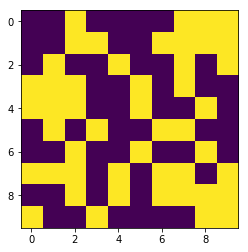

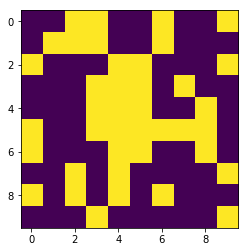

In [1]:
# 參考：用來生成 Game of Life 的下一個狀態，用來檢查
import numpy as np

def game(board):
    board_pad = np.pad(board, 1, 'constant', constant_values = 0)
    # 用比較笨的方式，厲害一點用 http://stackoverflow.com/questions/32660953/numpy-sliding-2d-window-calculations
    rtn = np.zeros_like(board)
    for i in range(board.shape[0]):
        for j in range(board.shape[1]):
            alive = board[i, j]
            neighbord_count = board_pad[i:i+3, j:j+3].sum() - alive
            if (alive and neighbord_count == 2) or neighbord_count==3:
                rtn[i,j] = 1
    return rtn
# 隨機生成一個盤面

board = np.random.randint(0,2, size=(10,10))
# 畫出來看看
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(0)
plt.imshow(board)

# 跑出下一個盤面
board_after = game(board)
# 畫出來看看
plt.figure(1)
plt.imshow(board_after);


In [2]:
#參考解答
#%load solutions/cnn_game_of_life.py
#%run solutions/cnn_game_of_life.py

In [3]:
# 或者用動畫跑跑看 需要 pillow, ipywidgets
# 定義一個動畫的函數
from IPython.display import display
from ipywidgets import Image as Image_widget
import time
from PIL import Image
def anim(func, time_length, interval=0.1, width=400):
    img = Image_widget(width=width)
    display(img)
    start_time = time.time()
    for t in np.arange(0, time_length, interval):
        frame = Image.fromarray((func(t)*255).astype('uint8'))
        img.value = frame._repr_png_()
        now = time.time()
        if now < start_time+t:
            time.sleep(start_time+t-now)

# 下面跑 Game of Life 的動畫
board = np.random.randint(0,2, size=(100,100))
def glife(t):
    if t>0:
        board[...] = game(board)
    return board
# 一分鐘
anim(glife, 60)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
